<a href="https://colab.research.google.com/github/srikarraju/GridWorld/blob/main/GridWorld_2x2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
class Gridworld:
  def __init__(self,grid_dim=4):
    self.grid_dim = grid_dim
    self.number_states = self.grid_dim*self.grid_dim - 1
    self.curr_state = 0

  def reset(self):
    self.curr_state = 0
    return self.curr_state

  def step(self,state,action):
    curr_state = (int(state/self.grid_dim),state%self.grid_dim)
    if action == 0:#Left
      if curr_state[1]-1<0:
        return state,-1,0
      else:
        next_state = (curr_state[0],curr_state[1]-1)
        if next_state[0]==self.grid_dim-1 and next_state[1]==self.grid_dim-1:
          return next_state[0]*self.grid_dim + next_state[1],0,1
        else:
          return next_state[0]*self.grid_dim + next_state[1],-1,0
    elif action ==1:#Right
      if curr_state[1]+1>=self.grid_dim:
        return state,-1,0
      else:
        next_state = (curr_state[0],curr_state[1]+1)
        if next_state[0]==self.grid_dim-1 and next_state[1]==self.grid_dim-1:
          return next_state[0]*self.grid_dim + next_state[1],0,1
        else:
          return next_state[0]*self.grid_dim + next_state[1],-1,0
    elif action ==2:#Up
      if curr_state[0]-1<0:
        return state,-1,0
      else:
        next_state = (curr_state[0]-1,curr_state[1])
        if next_state[0]==self.grid_dim-1 and next_state[1]==self.grid_dim-1:
          return next_state[0]*self.grid_dim + next_state[1],0,1
        else:
          return next_state[0]*self.grid_dim + next_state[1],-1,0
    elif action ==3:#Down
      if curr_state[0]+1>=self.grid_dim:
        return state,-1,0
      else:
        next_state = (curr_state[0]+1,curr_state[1])
        if next_state[0]==self.grid_dim-1 and next_state[1]==self.grid_dim-1:
          return next_state[0]*self.grid_dim + next_state[1],0,1
        else:
          return next_state[0]*self.grid_dim + next_state[1],-1,0
    else:
      print("Invalid Action")
      return None,0,1

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.distributions import Categorical
import gym
from collections import deque
import numpy as np

In [ ]:
def generate_state_features(grid_dim):
  state_features = []
  for row in range(grid_dim):
    for col in range(grid_dim):
      state_features.append([row,col])
  state_features = np.asarray(state_features)
  return state_features

In [ ]:
def generate_state_action_features(state_vec, d,num_actions):
  state_action_features = np.zeros(shape=(num_actions,d+num_actions))
  for i in range(num_actions):
    for j in range(d):
      state_action_features[i][j] = state_vec[j]
  state_action_features[0][d] = 1
  state_action_features[1][d+1] =  1
  state_action_features[2][d+2] =  1
  state_action_features[3][d+3] =  1
  return state_action_features

In [ ]:
# ALGORITHM 1
alpha_0, beta_0, gamma, epsilon = 0.1, 0.01, 0.95, 0.1
alpha_c, beta_c = 1000, 100000
t = 0
n_episode = 0
actions_list = []
avg_reward = 0

state_features = generate_state_features(grid_dim)
while n_episode <=10000:
  rewards,states,actions = [],[],[]
  state = 0
  t = 0
  episode_len = 0
  while episode_len<=100:
    episode_len += 1
    state_action_features = generate_state_action_features(state_features[state],d,num_actions)
    t += 1

    probs = np.dot(weights_p,np.transpose(state_action_features))

    probs -= probs.max()
    probs = np.exp(np.clip(probs/epsilon, -5,5))
    probs /= probs.sum()

    probs2 = probs.cumsum()
    action = np.where(probs2 >= np.random.random())[0][0]

    new_state, reward, done = env.step(state,action)


    value_curr = np.dot(weights_v,np.asarray(state_features[state]))
    value_next = np.dot(weights_v,np.asarray(state_features[new_state]))

    beta = (beta_0 * beta_c) / (beta_c + t)
    alpha = (alpha_0 * alpha_c) / (alpha_c + t**(2/3))

    avg_reward = (1 - alpha*gamma)* avg_reward + gamma * alpha* reward
    td_error = reward + value_curr - value_next - avg_reward

    weights_v += alpha*(abs(td_error)/td_error) * np.asarray(state_features[state])

    weights_p += beta* (abs(td_error)/td_error)* probs[action]* (1 - probs[action])*state_action_features[action]


    states.append(state)
    actions.append(action)
    rewards.append(reward)
    actions_list.append(action)

    state = new_state
    if done == 1:
      break

  returns.append(np.sum(rewards))
  if n_episode%10==0:
    print("Episode: {:6d}\tAvg. Return: {:6.2f}".format(n_episode, np.mean(returns)))
  rewards1.append(np.mean(returns))
  n_episode += 1

Episode:      0	Avg. Return: -48.00
Episode:     10	Avg. Return: -22.91
Episode:     20	Avg. Return: -16.57
Episode:     30	Avg. Return: -13.81
Episode:     40	Avg. Return: -12.41
Episode:     50	Avg. Return: -11.82
Episode:     60	Avg. Return: -11.39
Episode:     70	Avg. Return: -11.03
Episode:     80	Avg. Return: -10.94
Episode:     90	Avg. Return: -10.55
Episode:    100	Avg. Return:  -9.92
Episode:    110	Avg. Return:  -8.88
Episode:    120	Avg. Return:  -8.81
Episode:    130	Avg. Return:  -8.77
Episode:    140	Avg. Return:  -8.63
Episode:    150	Avg. Return:  -8.63
Episode:    160	Avg. Return:  -8.52
Episode:    170	Avg. Return:  -8.61
Episode:    180	Avg. Return:  -8.31
Episode:    190	Avg. Return:  -8.31
Episode:    200	Avg. Return:  -8.53
Episode:    210	Avg. Return:  -8.40
Episode:    220	Avg. Return:  -8.28
Episode:    230	Avg. Return:  -8.33
Episode:    240	Avg. Return:  -8.44
Episode:    250	Avg. Return:  -8.17
Episode:    260	Avg. Return:  -8.17
Episode:    270	Avg. Return:

In [ ]:
print(max(rewards4))

-7.36


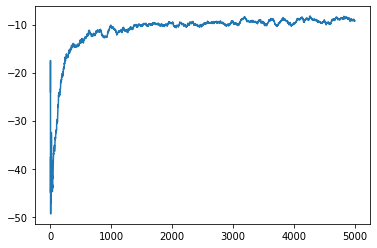

In [ ]:
import matplotlib.pyplot as plt
#plt.plot(rewards2)
plt.plot(rewards4[0:5000])
plt.show()

In [ ]:
#ALGORITHM 2
alpha_0, beta_0, gamma, epsilon = 0.1, 0.01, 0.95, 0.1
alpha_c, beta_c = 1000, 1000
t = 0
n_episode = 0
avg_reward = 0
lamda = 0.9

fischer_inv = 1.5*np.eye(6)
state_features = generate_state_features(grid_dim)

while n_episode <=15000:
  rewards,states,actions = [],[],[]
  state = 0
  episode_len = 0
  t = 0

  while episode_len<100:
    episode_len += 1
    t += 1
    state_action_features = generate_state_action_features(state_features[state],d,num_actions)

    probs = np.dot(state_action_features,weights_p)
    probs -= probs.max()
    probs = np.exp(np.clip(probs/epsilon, -500, 500))
    probs /= probs.sum()
    probs2 = probs.cumsum()
    action = np.where(probs2 >= np.random.random())[0][0]

    new_state, reward, done = env.step(state,action)


    value_curr = np.dot(weights_v,state_features[state])
    value_next = np.dot(weights_v,state_features[state])

    beta = (beta_0 * beta_c) / (beta_c + t)
    alpha = (alpha_0 * alpha_c) / (alpha_c + t**(2/3))

    avg_reward = (1 - alpha*gamma)*avg_reward + alpha*gamma * reward

    td_error = reward + value_next - value_curr - avg_reward

    weights_v += alpha * td_error * np.asarray(state_features[state])
    #weights_v += alpha * td_error * e_traces
    #e_traces = gamma*lamda *e_traces + np.asarray(state_features[state])

    grad_prob = probs[action]*(1-probs[action])*state_action_features[action]

    Gt_psi_dot = np.dot(fischer_inv, grad_prob)
    fischer_inv -= (0.00001*alpha * np.outer(Gt_psi_dot,Gt_psi_dot) ) / (1 - 0.00001*alpha + 0.00001*alpha * np.dot(Gt_psi_dot,grad_prob))
    fischer_inv /= (1 - 0.00001*alpha)

    weights_p += 0.1*beta * td_error * np.dot(fischer_inv,grad_prob)

    states.append(state)
    actions.append(action)
    rewards.append(reward)

    state = new_state
    if done==1:
      break

  returns.append(np.sum(rewards))
  if n_episode%100==0:
    print("Episode: {:6d}\tAvg. Return: {:6.2f}".format(n_episode, np.mean(returns)))
  rewards2.append(np.mean(returns))
  n_episode += 1

In [ ]:
#ALGORITHM 4
alpha_0, beta_0, gamma, epsilon = 0.1, 0.01, 0.95, 0.1
alpha_c, beta_c = 1000, 1000
t = 0
n_episode = 0
avg_reward = 0

fischer_inv = 2.5*np.eye(6)
state_features = generate_state_features(grid_dim)

while n_episode <=15000:
  rewards,states,actions = [],[],[]
  state = 0
  episode_len = 0

  while episode_len<100:
    episode_len += 1
    t += 1
    state_action_features = generate_state_action_features(state_features[state],d,num_actions)

    probs = np.dot(state_action_features,weights_p)
    probs -= probs.max()
    probs = np.exp(np.clip(probs/epsilon, -500, 500))
    probs /= probs.sum()
    probs2 = probs.cumsum()
    action = np.where(probs2 >= np.random.random())[0][0]

    new_state, reward, done = env.step(state,action)


    value_curr = np.dot(weights_v,state_features[state])
    value_next = np.dot(weights_v,state_features[state])

    beta = (beta_0 * beta_c) / (beta_c + t)
    alpha = (alpha_0 * alpha_c) / (alpha_c + t**(2/3))

    avg_reward = (1 - alpha*gamma)*avg_reward + alpha*gamma * reward

    td_error = reward + value_next - value_curr - avg_reward

    weights_v += alpha * td_error * np.asarray(state_features[state])

    grad_prob = probs[action]*(1-probs[action])*state_action_features[action]

    Gt_psi_dot = np.dot(fischer_inv, grad_prob)
    fischer_inv -= (0.00001*alpha * np.outer(Gt_psi_dot,Gt_psi_dot) ) / (1 - 0.00001*alpha + 0.00001*alpha * np.dot(Gt_psi_dot,grad_prob))
    fischer_inv /= (1 - 0.00001*alpha)
    weights_w = (1- alpha) *weights_w + alpha* td_error * np.dot(fischer_inv,grad_prob)

    weights_p += beta * weights_w

    states.append(state)
    actions.append(action)
    rewards.append(reward)

    state = new_state
    if done==1:
      break

  returns.append(np.sum(rewards))
  if n_episode%50==0:
    print("Episode: {:6d}\tAvg. Return: {:6.2f}".format(n_episode, np.mean(returns)))
  rewards4.append(np.mean(returns))
  n_episode += 1

In [ ]:
print(np.sum(rewards))

-8


In [ ]:
print(probs)

[0.07891784 0.4198805  0.08091556 0.42028609]


In [ ]:
print(states)
print(actions)

[0, 1, 5, 6, 5, 6, 7, 6, 10]
[1, 3, 1, 0, 1, 1, 0, 3, 3]


In [ ]:
print(rewards)

[-1, -1, -1, -1, -1, -1, -1, -1, -1]


In [ ]:
grid_dim = 4
num_actions = 4
d = 2

env = Gridworld(grid_dim)
#print(env)
returns = deque(maxlen=100)
weights_v = np.zeros(2)
weights_p = np.zeros(d+num_actions)
weights_w = np.zeros(d+num_actions)
e_traces = np.zeros(2)
rewards3 = []

# weights_v = np.random.rand(2)
# weights_p = np.random.rand(d+num_actions)
# weights_w = np.random.rand(d+num_actions)

print(weights_v)
print(weights_p)
print(weights_w)

[0. 0.]
[0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0.]


In [ ]:
#ALGORITHM 3
alpha_0, beta_0, gamma, epsilon = 0.1, 0.01, 0.95, 0.1
alpha_c, beta_c = 1000, 100000
t = 0
n_episode = 0
avg_reward = 0

state_features = generate_state_features(grid_dim)
while n_episode <=15000:
  rewards,states,actions = [],[],[]
  state = 0
  episode_len = 0
  while episode_len<100:
    episode_len += 1
    state_action_features = generate_state_action_features(state_features[state],d,num_actions)
    t += 1

    probs = np.dot(weights_p,np.transpose(state_action_features))

    probs -= probs.max()
    probs = np.exp(np.clip(probs/epsilon, -500, 500))
    probs /= probs.sum()
    probs2 = probs.cumsum()
    action = np.where(probs2 >= np.random.random())[0][0]

    new_state, reward, done = env.step(state,action)


    value_curr = np.dot(weights_v,np.asarray(state_features[state]))
    value_next = np.dot(weights_v,np.asarray(state_features[new_state]))

    beta = (beta_0 * beta_c) / (beta_c + t)
    alpha = (alpha_0 * alpha_c) / (alpha_c + t**(2/3))

    avg_reward = (1 - alpha*gamma)*avg_reward + alpha*gamma * reward

    td_error = reward + value_next - value_curr - avg_reward

    weights_v += 0.01*alpha * td_error*np.asarray(state_features[state])

    grad_prob = probs[action]*(1 - probs[action]) * np.asarray(state_action_features[action])

    weights_w = np.dot(np.eye(grad_prob.size) - 0.001*alpha * np.outer(grad_prob, grad_prob), weights_w) + 0.001*alpha*td_error*grad_prob
    weights_p += 0.01*beta * weights_w


    states.append(state)
    actions.append(action)
    rewards.append(reward)

    state = new_state
    if done == 1:
      break

  returns.append(np.sum(rewards))
  if n_episode%50==0:
    print("Episode: {:6d}\tAvg. Return: {:6.2f}".format(n_episode, np.mean(returns)))
  rewards3.append(np.mean(returns))
  n_episode += 1

Episode:      0	Avg. Return: -100.00
Episode:     50	Avg. Return: -45.22
Episode:    100	Avg. Return: -47.69
Episode:    150	Avg. Return: -48.89
Episode:    200	Avg. Return: -45.33
Episode:    250	Avg. Return: -47.84
Episode:    300	Avg. Return: -47.88
Episode:    350	Avg. Return: -46.54
Episode:    400	Avg. Return: -46.04
Episode:    450	Avg. Return: -46.16
Episode:    500	Avg. Return: -46.01
Episode:    550	Avg. Return: -41.84
Episode:    600	Avg. Return: -36.08
Episode:    650	Avg. Return: -30.20
Episode:    700	Avg. Return: -28.84
Episode:    750	Avg. Return: -28.27
Episode:    800	Avg. Return: -26.93
Episode:    850	Avg. Return: -25.00
Episode:    900	Avg. Return: -23.53
Episode:    950	Avg. Return: -22.32
Episode:   1000	Avg. Return: -19.74
Episode:   1050	Avg. Return: -19.94
Episode:   1100	Avg. Return: -22.25
Episode:   1150	Avg. Return: -20.47
Episode:   1200	Avg. Return: -18.42
Episode:   1250	Avg. Return: -16.63
Episode:   1300	Avg. Return: -14.85
Episode:   1350	Avg. Return

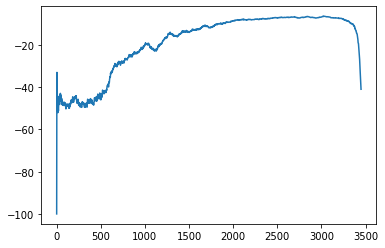

In [ ]:
import matplotlib.pyplot as plt
plt.plot(rewards3[:3450])
plt.show()